This code formats and analyzes weather data from the station at Cape May in NJ.

This code is used in file 2.2 for modelling.

https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

In [1]:
import numpy as np
import pandas as pd
import datetime
import urllib.request
import netCDF4
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Parse turns the data into Datetime format.
weather = pd.read_csv('./CapeMayWeather.csv',parse_dates=['DATE'])
weather = weather.drop('STATION', axis=1)
weather = weather.drop('NAME', axis=1)
weather = weather.drop('WT01', axis=1)
weather = weather.drop('WT03', axis=1)
weather = weather.drop('WT04', axis=1)
weather = weather.drop('WT05', axis=1)
weather = weather.drop('WT06', axis=1)
weather = weather.drop('WT11', axis=1)
weather = weather.drop('SNOW', axis=1)
weather = weather.drop('SNWD', axis=1)
weather = weather.drop('TOBS', axis=1)
weather.head(10)

,DATE,PRCP,TMAX,TMIN
0,2005-01-01,0.00,65.0,38.0
1,2005-01-02,0.00,50.0,38.0
2,2005-01-03,0.00,61.0,37.0
3,2005-01-04,0.00,62.0,44.0
4,2005-01-05,0.12,46.0,40.0
5,2005-01-06,0.02,51.0,43.0
6,2005-01-07,0.00,46.0,38.0
7,2005-01-08,0.92,50.0,39.0
8,2005-01-09,0.00,42.0,33.0
9,2005-01-10,0.00,50.0,35.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cape May Temp')

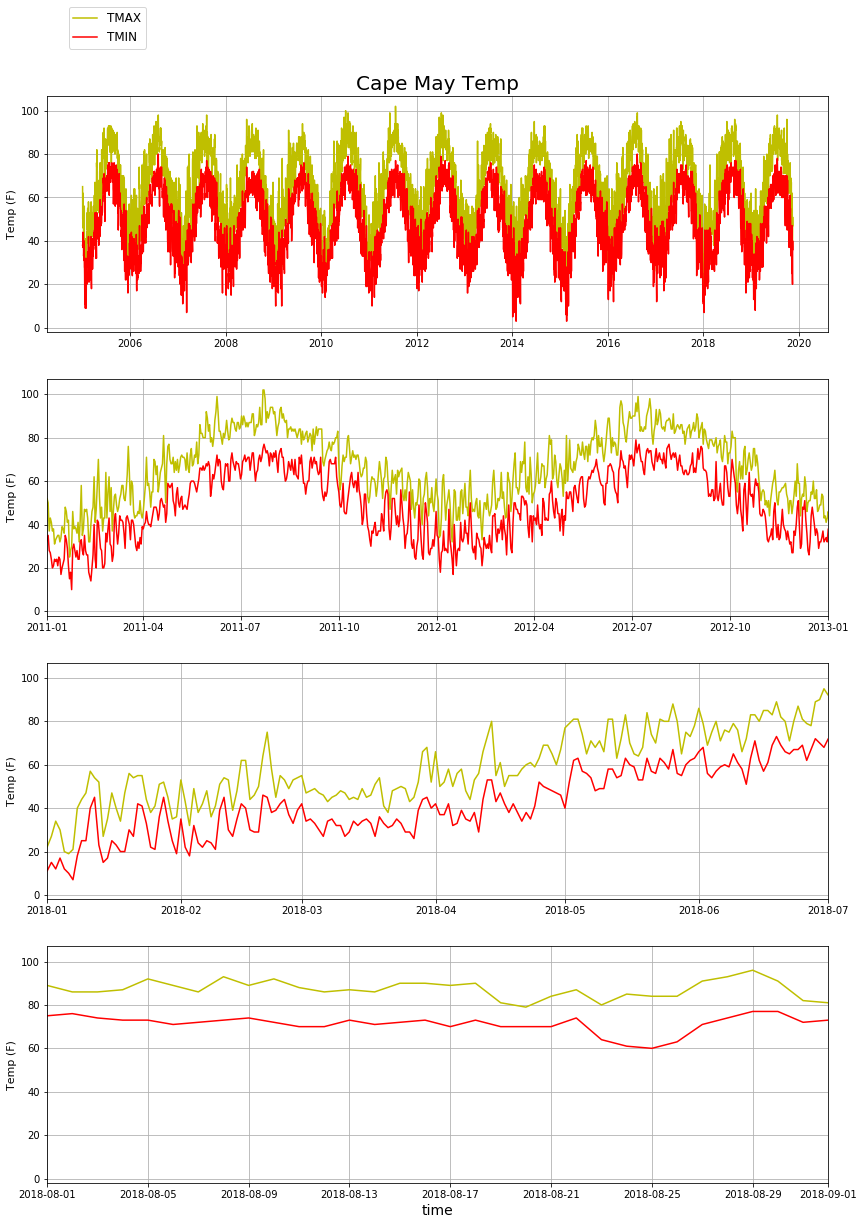

In [3]:
t0 = weather.DATE

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,20))
ax[0].plot(t0,weather.TMAX,c='y')
ax[0].plot(t0,weather.TMIN,c='r')

ax[1].plot(t0,weather.TMAX,c='y')
ax[1].plot(t0,weather.TMIN,c='r')
ax[1].set_xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2013-01-01'))

ax[2].plot(t0,weather.TMAX,c='y')
ax[2].plot(t0,weather.TMIN,c='r')
ax[2].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-07-01'))

ax[3].plot(t0,weather.TMAX,c='y')
ax[3].plot(t0,weather.TMIN,c='r')
ax[3].set_xlim(pd.Timestamp('2018-08-01'), pd.Timestamp('2018-09-01'))


ax[0].legend(['TMAX','TMIN'], fontsize=12,
              loc='upper left',bbox_to_anchor=(0.02,1.4))
for i in range(len(ax)): ax[i].set_ylabel('Temp (F)', fontsize=11)
for i in range(len(ax)): ax[i].grid()

ax[3].set_xlabel('time', fontsize=14);
ax[0].set_title('Cape May Temp',fontsize=20)

Text(0.5, 1.0, 'Cape May Precip')

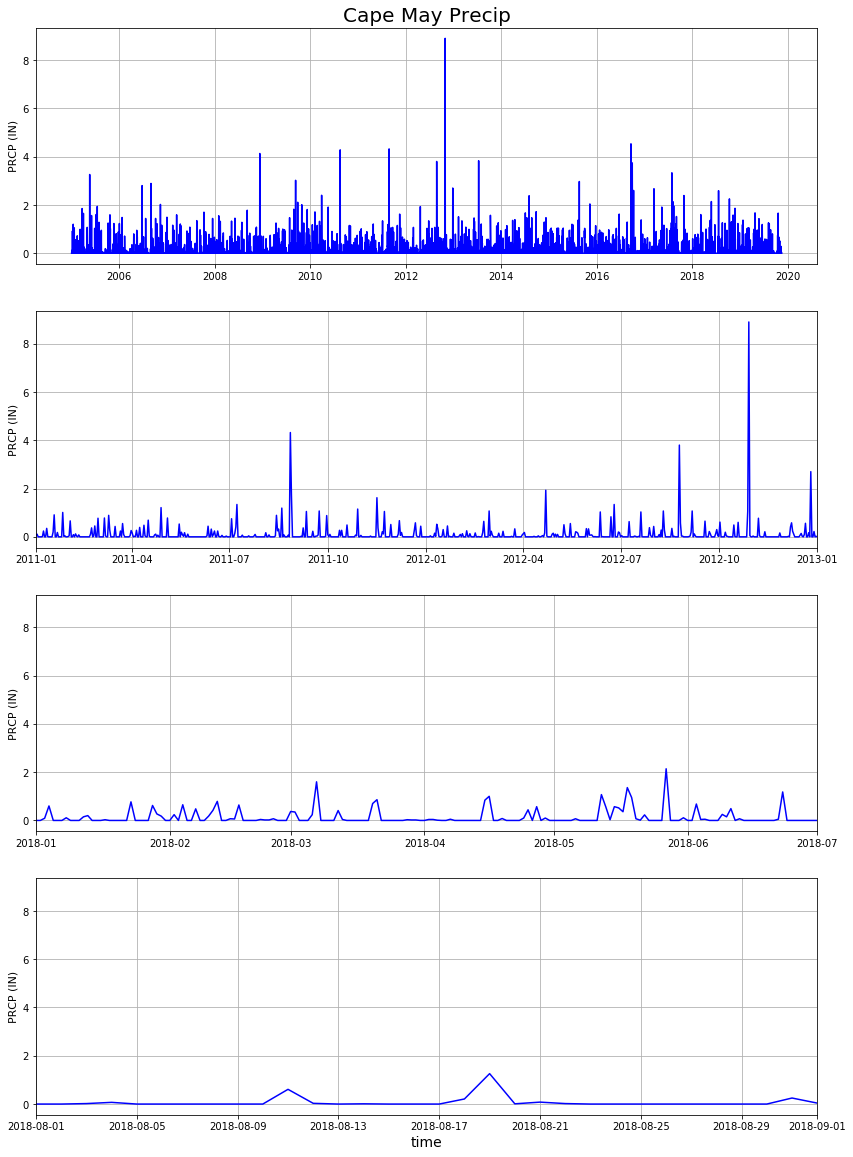

In [4]:
t0 = weather.DATE

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,20))
ax[0].plot(t0,weather.PRCP,c='b')

ax[1].plot(t0,weather.PRCP,c='b')
ax[1].set_xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2013-01-01'))

ax[2].plot(t0,weather.PRCP,c='b')
ax[2].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-07-01'))

ax[3].plot(t0,weather.PRCP,c='b')
ax[3].set_xlim(pd.Timestamp('2018-08-01'), pd.Timestamp('2018-09-01'))

for i in range(len(ax)): ax[i].set_ylabel('PRCP (IN)', fontsize=11)
for i in range(len(ax)): ax[i].grid()

ax[3].set_xlabel('time', fontsize=14);
ax[0].set_title('Cape May Precip',fontsize=20)

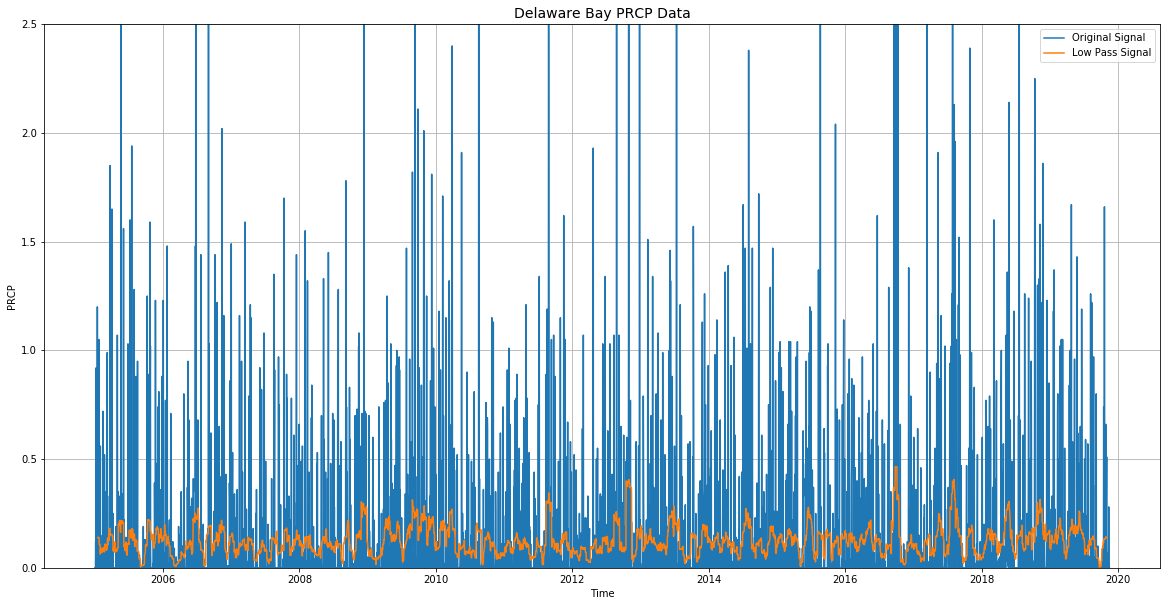

In [5]:
# Create Low Pass Filter 

origSignalPRCP = weather.PRCP

windowSize = 30 #30 day window seems appropriate given the time scale of the data (years)

lowPassPRCP = origSignalPRCP.rolling(windowSize, center=True).mean()

fig1 = plt.figure(figsize=(20, 10)) #figsize=(50, 20)
ax1 = fig1.add_subplot(111)
ax1.plot(weather.DATE, weather.PRCP, label='Original Signal')
ax1.plot(weather.DATE, lowPassPRCP, label='Low Pass Signal')
ax1.set_ylim(0,2.5)

plt.xlabel('Time')
plt.ylabel('PRCP')
plt.title('Delaware Bay PRCP Data', fontsize=14)
ax1.legend()
ax1.grid()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Text(0.5, 1.0, 'Autocorrelation Plot of Low Pass Filtered Signal - PRCP')

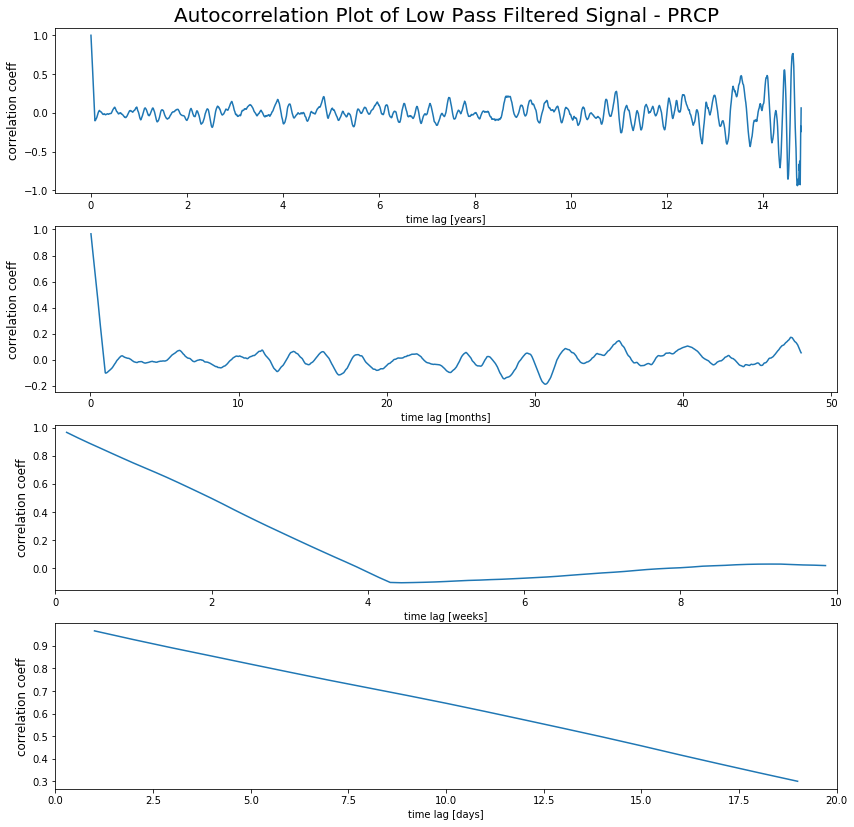

In [6]:
lowPass0 = weather.copy()
lowPass0.PRCP = lowPassPRCP
lowPass0.DATE = lowPass0.DATE - lowPass0.DATE.iloc[0]
timeLags = lowPass0.DATE.dt.days

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,14))

autoCorr = [lowPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(timeLags/365, autoCorr); 
ax[0].set_xlabel('time lag [years]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,48*30) # 48 months
autoCorr = [lowPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1/30*timeLags, autoCorr); 
ax[1].set_xlabel('time lag [months]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,10*7) # 10 weeks
autoCorr = [lowPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1/7*timeLags, autoCorr);
ax[2].set_xlabel('time lag [weeks]'); ax[2].set_ylabel('correlation coeff', fontsize=12);
ax[2].set_xlim(0, 10)

timeLags = np.arange(1,20) # 20 days
autoCorr = [lowPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [days]'); ax[3].set_ylabel('correlation coeff', fontsize=12);
ax[3].set_xlim(0, 20)

ax[0].set_title('Autocorrelation Plot of Low Pass Filtered Signal - PRCP', fontsize=20)

Text(0.5, 0, 'time')

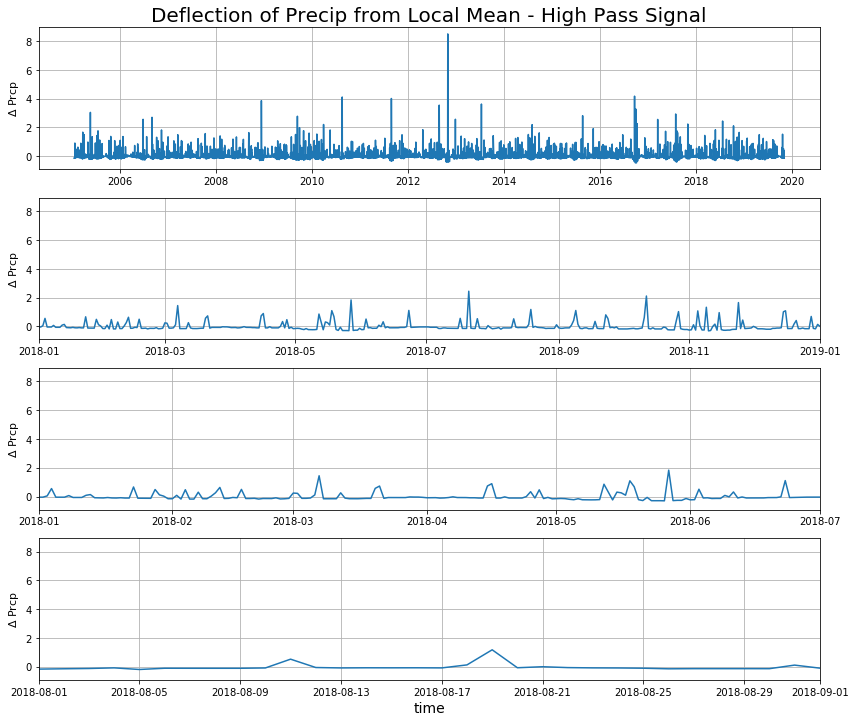

In [7]:
highPassPRCP = origSignalPRCP - lowPassPRCP

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].plot(t0,highPassPRCP)

ax[1].plot(t0,highPassPRCP)
ax[1].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-01-01'))

ax[2].plot(t0,highPassPRCP)
ax[2].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-07-01'))

ax[3].plot(t0,highPassPRCP)
ax[3].set_xlim(pd.Timestamp('2018-08-01'), pd.Timestamp('2018-09-01'))

ax[0].set_title('Deflection of Precip from Local Mean - High Pass Signal',fontsize=20)
for i in range(len(ax)): ax[i].set_ylabel('$\Delta$ Prcp', fontsize=11)
for i in range(len(ax)): ax[i].grid()

ax[3].set_xlabel('time', fontsize=14)

Text(0.5, 1.0, 'Autocorrelation Plot of High Pass Filtered Signal - PRCP')

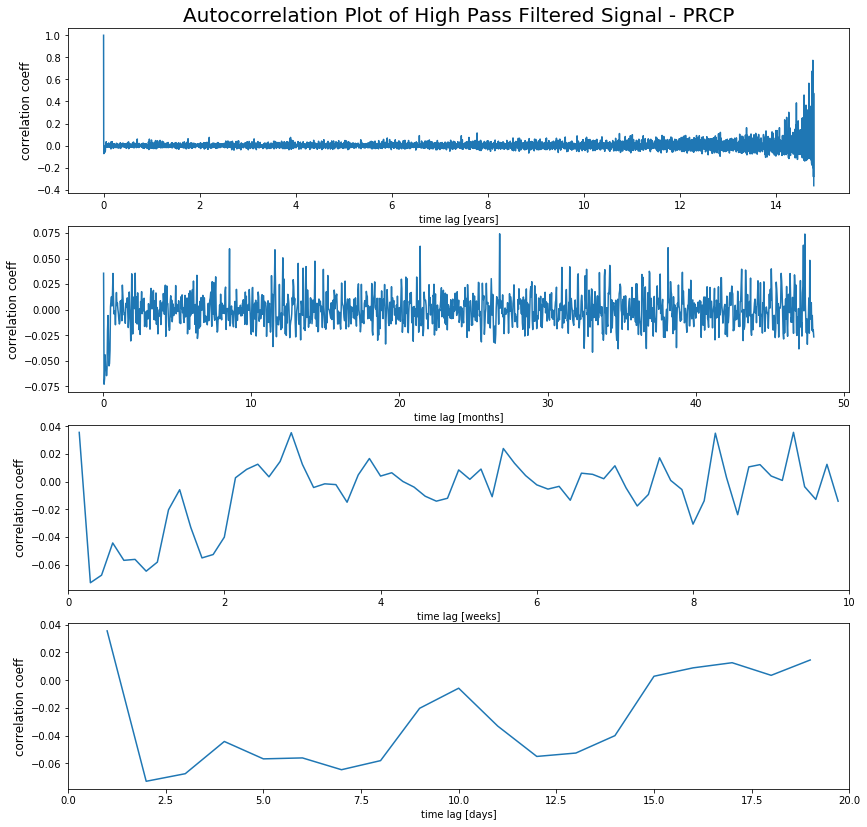

In [8]:
highPass0 = weather.copy()
# lowPass0.PRCP = lowPassPRCP
highPass0.DATE = highPass0.DATE - highPass0.DATE.iloc[0]
timeLags = highPass0.DATE.dt.days
# timeLags/365
# timeLags

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,14))

autoCorr = [highPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(timeLags/365, autoCorr); 
ax[0].set_xlabel('time lag [years]'); ax[0].set_ylabel('correlation coeff', fontsize=12);
# ax[0].set_xlim(0, 10)

timeLags = np.arange(1,48*30) # 48 months
autoCorr = [highPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1/30*timeLags, autoCorr); 
ax[1].set_xlabel('time lag [months]'); ax[1].set_ylabel('correlation coeff', fontsize=12);
# ax[1].set_xlim(0, 120)

timeLags = np.arange(1,10*7) # 10 weeks
autoCorr = [highPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1/7*timeLags, autoCorr);
ax[2].set_xlabel('time lag [weeks]'); ax[2].set_ylabel('correlation coeff', fontsize=12);
ax[2].set_xlim(0, 10)

timeLags = np.arange(1,20) # 20 days
autoCorr = [highPassPRCP.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [days]'); ax[3].set_ylabel('correlation coeff', fontsize=12);
ax[3].set_xlim(0, 20)

ax[0].set_title('Autocorrelation Plot of High Pass Filtered Signal - PRCP', fontsize=20)

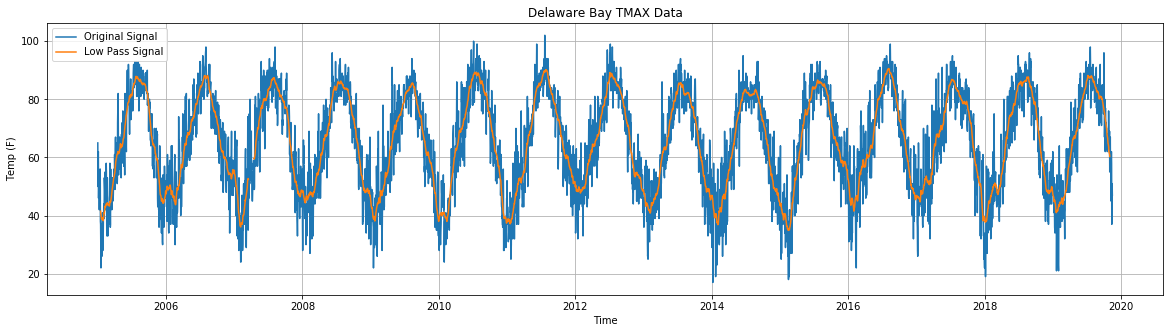

In [9]:
# Create Low Pass Filter 

origSignalTMAX = weather.TMAX

windowSize = 30 #30 day window seems appropriate given the time scale of the data (years)

lowPassTMAX = origSignalTMAX.rolling(windowSize, center=True).mean()

fig1 = plt.figure(figsize=(20, 5)) #figsize=(50, 20)
ax1 = fig1.add_subplot(111)
ax1.plot(weather.DATE, weather.TMAX, label='Original Signal')
ax1.plot(weather.DATE, lowPassTMAX, label='Low Pass Signal')

plt.xlabel('Time')
plt.ylabel('Temp (F)')
plt.title('Delaware Bay TMAX Data')
ax1.legend()
ax1.grid()

Text(0.5, 1.0, 'Autocorrelation Plot of Low Pass Filtered Signal - TMAX')

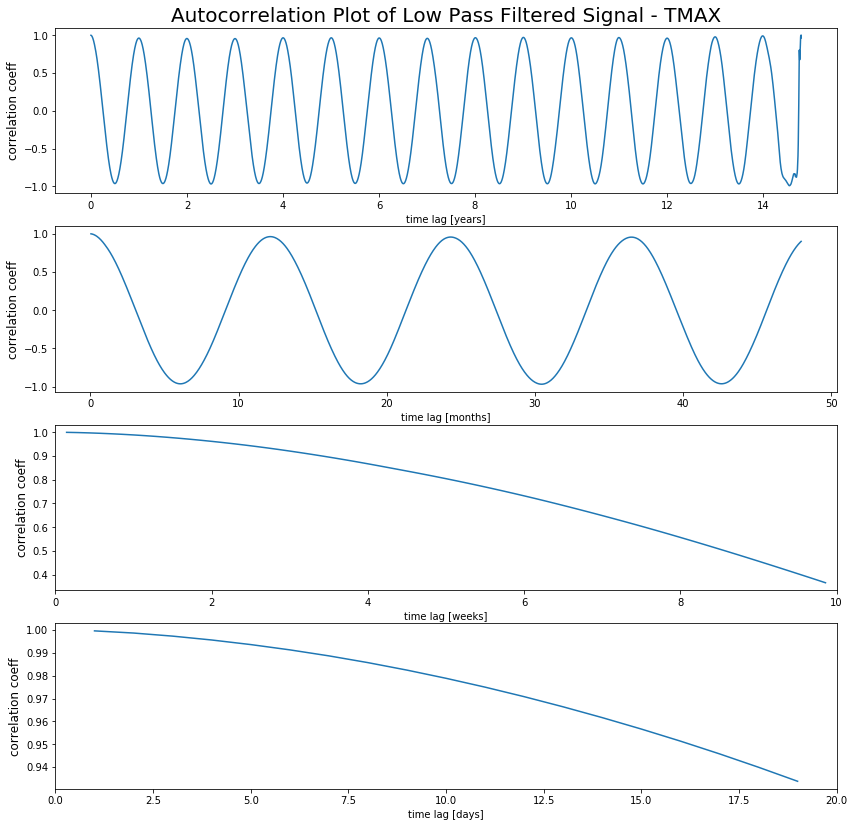

In [10]:
lowPass2 = weather.copy()
lowPass2.TMAX = lowPassTMAX
lowPass2.DATE = lowPass2.DATE - lowPass2.DATE.iloc[0]
timeLags = lowPass2.DATE.dt.days

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,14))

autoCorr = [lowPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(timeLags/365, autoCorr); 
ax[0].set_xlabel('time lag [years]'); ax[0].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,48*30) # 48 months
autoCorr = [lowPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1/30*timeLags, autoCorr); 
ax[1].set_xlabel('time lag [months]'); ax[1].set_ylabel('correlation coeff', fontsize=12);

timeLags = np.arange(1,10*7) # 10 weeks
autoCorr = [lowPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1/7*timeLags, autoCorr);
ax[2].set_xlabel('time lag [weeks]'); ax[2].set_ylabel('correlation coeff', fontsize=12);
ax[2].set_xlim(0, 10)

timeLags = np.arange(1,20) # 20 days
autoCorr = [lowPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [days]'); ax[3].set_ylabel('correlation coeff', fontsize=12);
ax[3].set_xlim(0, 20)

ax[0].set_title('Autocorrelation Plot of Low Pass Filtered Signal - TMAX', fontsize=20)

Text(0.5, 0, 'time')

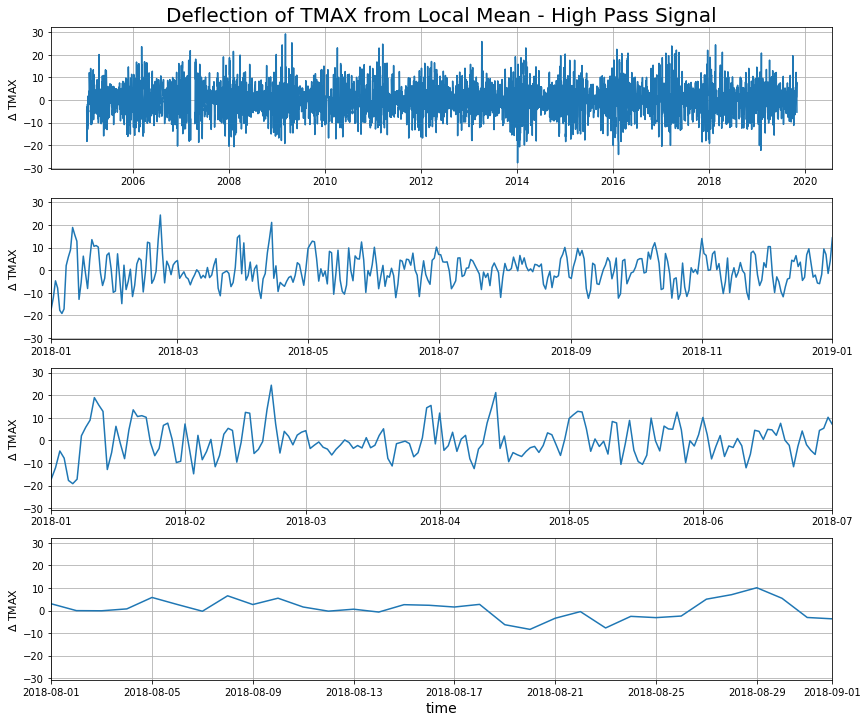

In [11]:
highPassTMAX = origSignalTMAX - lowPassTMAX

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,12))
ax[0].plot(t0,highPassTMAX)

ax[1].plot(t0,highPassTMAX)
ax[1].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-01-01'))

ax[2].plot(t0,highPassTMAX)
ax[2].set_xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2018-07-01'))

ax[3].plot(t0,highPassTMAX)
ax[3].set_xlim(pd.Timestamp('2018-08-01'), pd.Timestamp('2018-09-01'))

ax[0].set_title('Deflection of TMAX from Local Mean - High Pass Signal',fontsize=20)
for i in range(len(ax)): ax[i].set_ylabel('$\Delta$ TMAX', fontsize=11)
for i in range(len(ax)): ax[i].grid()

ax[3].set_xlabel('time', fontsize=14)

Text(0.5, 1.0, 'Autocorrelation Plot of High Pass Filtered Signal - TMAX')

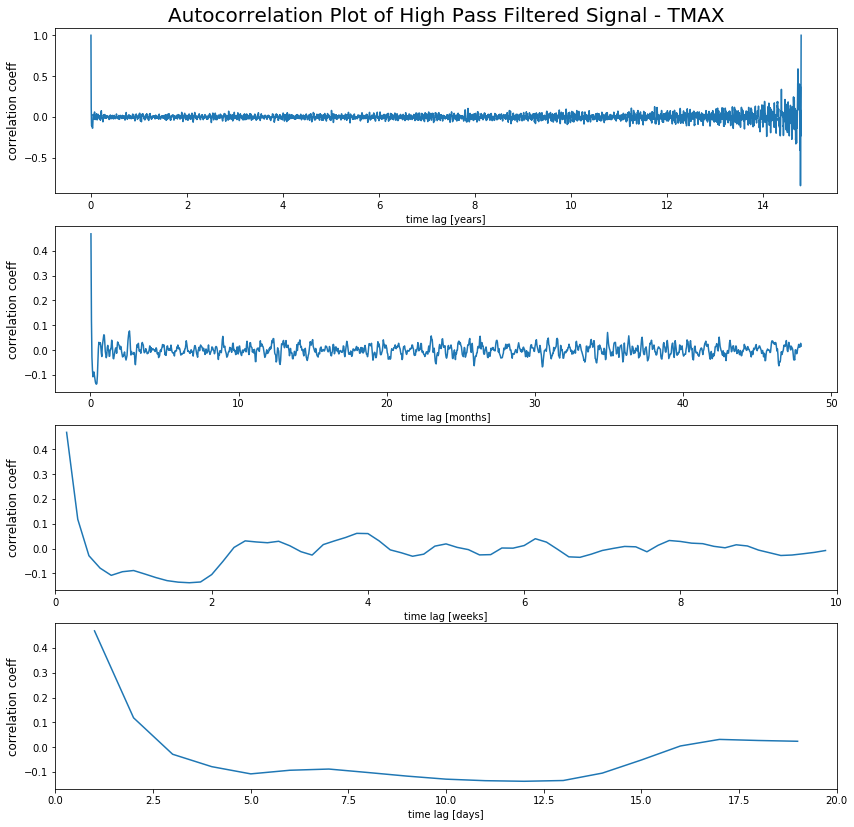

In [12]:
highPass2 = weather.copy()
# highPass2.TMAX = lowPassTMAX
highPass2.DATE = highPass2.DATE - highPass2.DATE.iloc[0]
timeLags = highPass2.DATE.dt.days
# timeLags/365
# timeLags

fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(14,14))

autoCorr = [highPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[0].plot(timeLags/365, autoCorr); 
ax[0].set_xlabel('time lag [years]'); ax[0].set_ylabel('correlation coeff', fontsize=12);
# ax[0].set_xlim(0, 10)

timeLags = np.arange(1,48*30) # 48 months
autoCorr = [highPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[1].plot(1/30*timeLags, autoCorr); 
ax[1].set_xlabel('time lag [months]'); ax[1].set_ylabel('correlation coeff', fontsize=12);
# ax[1].set_xlim(0, 120)

timeLags = np.arange(1,10*7) # 10 weeks
autoCorr = [highPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[2].plot(1/7*timeLags, autoCorr);
ax[2].set_xlabel('time lag [weeks]'); ax[2].set_ylabel('correlation coeff', fontsize=12);
ax[2].set_xlim(0, 10)

timeLags = np.arange(1,20) # 20 days
autoCorr = [highPassTMAX.autocorr(lag=dt) for dt in timeLags]
ax[3].plot(timeLags, autoCorr);
ax[3].set_xlabel('time lag [days]'); ax[3].set_ylabel('correlation coeff', fontsize=12);
ax[3].set_xlim(0, 20)

ax[0].set_title('Autocorrelation Plot of High Pass Filtered Signal - TMAX', fontsize=20)

Text(0.5, 1.0, 'FFT PRCP')

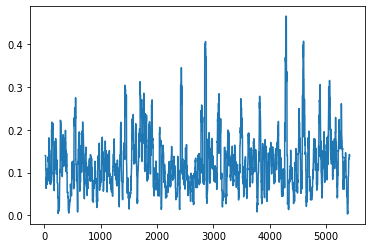

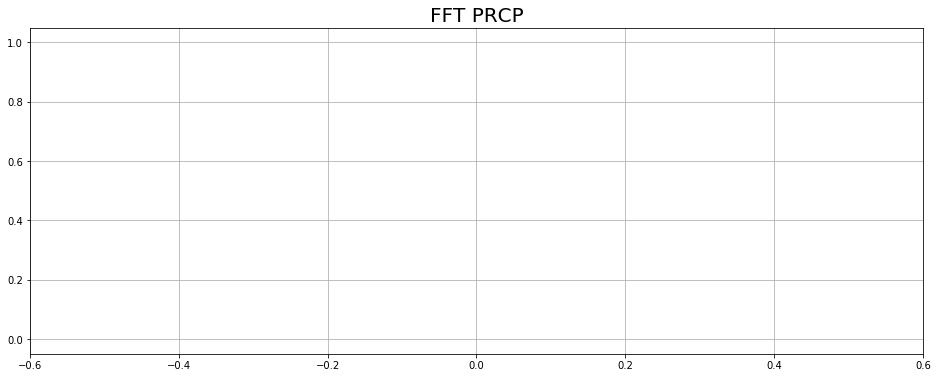

In [13]:
import numpy as np
from scipy.fftpack import rfft, irfft, fftfreq

lowPassPRCP = lowPass0.copy() #there are NAN values that can't be computed into a FFT
# lowPassPRCP = lowPassPRCP.dropna(axis=0,how="any")

time   = lowPassPRCP.DATE - lowPassPRCP.DATE.iloc[0]
time   = time.dt.days
signal = lowPassPRCP.PRCP # 1502  values
plt.figure(0)
plt.plot(time,signal)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)
fig1 = plt.figure(1, figsize=(16,6)) #, figsize=(14,12)
ax1 = fig1.add_subplot(111)
ax1.plot(W,f_signal)
ax1.grid()
ax1.set_xlim(-0.6, 0.6)
ax1.set_title('FFT PRCP', fontsize=20)

#Couldn't get this code to produce a fourier transform

In [14]:
# lowPass2 = lowPass2.drop('PRCP', axis=1)
# lowPass2 = lowPass2.drop('TMIN', axis=1)
# # lowPass2

Text(0.5, 1.0, 'FFT TMAX')

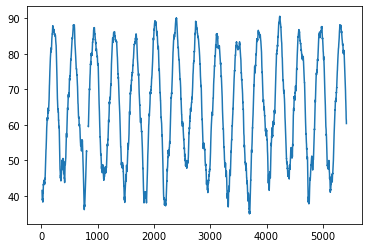

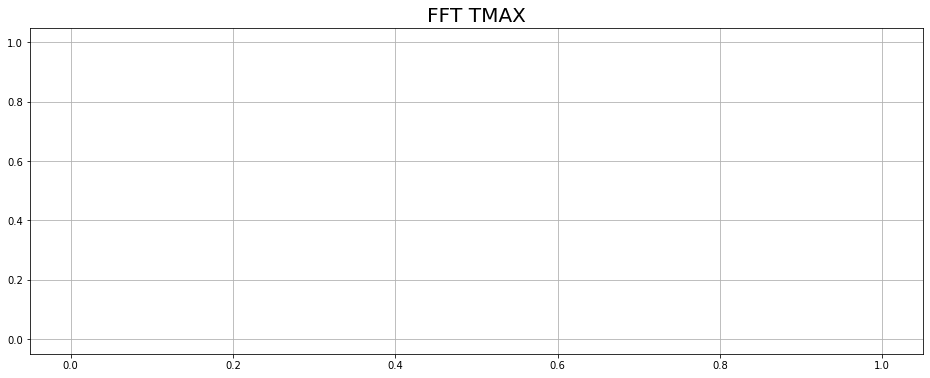

In [15]:
# lowPass2 = lowPass2.dropna(axis=0,how="any")

lowPassTMAX = lowPass2 #[there are NAN values that can't be computed into a FFT
# lowPassTMAX = lowPassTMAX.dropna(axis=0,how="any")

time   = lowPassTMAX.DATE - lowPassTMAX.DATE.iloc[0] #.dt.days 
time   = time.dt.days
signal = lowPassTMAX.TMAX
plt.figure(0)
plt.plot(time,signal)

W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)
fig1 = plt.figure(1, figsize=(16,6)) #, figsize=(14,12)
ax1 = fig1.add_subplot(111)
ax1.plot(W,f_signal)
ax1.grid()
# ax1.set_xlim(-0.6, 0.6)
ax1.set_title('FFT TMAX', fontsize=20)

#Couldn't get this code to produce a fourier transform